In [1]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
import math

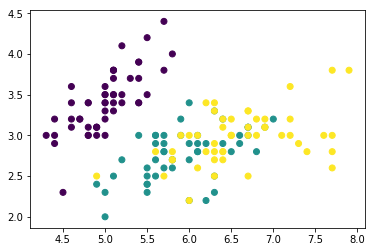

In [46]:
iris = datasets.load_iris()
X = iris.data[:,:2] #First two features of iris dataset
Y = iris.target
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

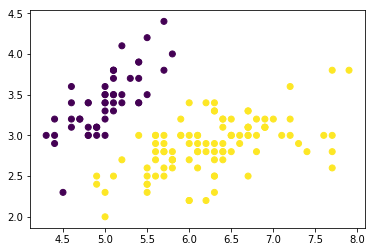

In [47]:
Y = (Y!=0) * 1
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

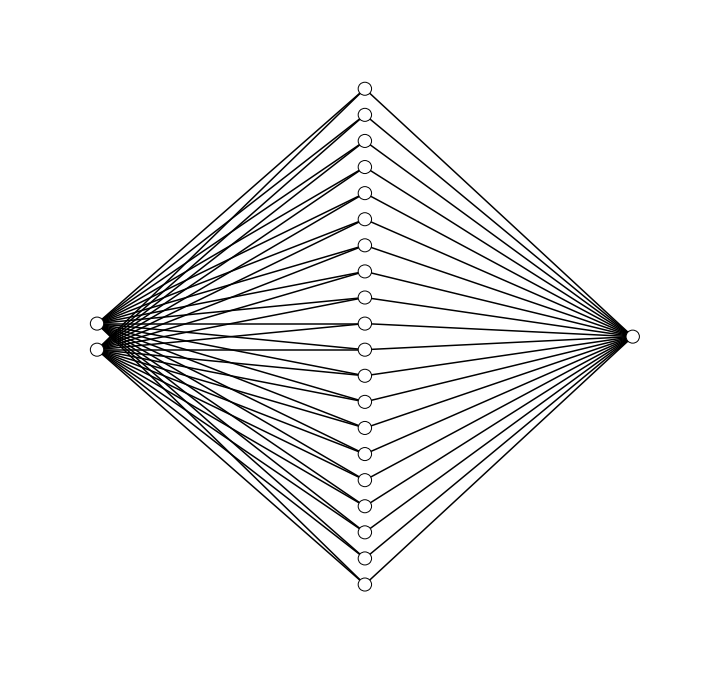

In [61]:
# Neural net visualization taken from https://gist.github.com/craffel/2d727968c3aaebd10359 

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 20, 1])

In [48]:
def activation(x,derivative=False):
    if derivative:
        return 1-np.power(x,2)
    return np.tanh(x)

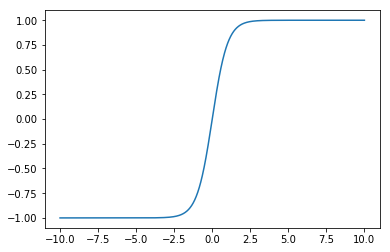

In [49]:
_X = np.linspace(-10,10,1000)
_Y = activation(_X)
plt.plot(_X,_Y)
plt.show()

In [50]:
print(X.shape)
Y = np.array(Y)[:,np.newaxis]
print(Y.shape)

(150, 2)
(150, 1)


In [54]:
def loss_function(hx,y,derivative=False):
    if derivative:
        return -(y-hx)
    return np.sum(np.power(hx-y,2)) / 2

In [58]:
hidden_layer_num = 20
output_layer_num = 1

def gradient_descent(X,Y,learning_rate=0.01,iterations=1000):
    # X: m x n where n = number of features
    # Y: m x c where c = number of classes for classification
    m = X.shape[0]
    n = X.shape[1]
    # Change X to m x (n+1) to add a bias node
    X = np.hstack((np.ones((m,1)),X))
    
    #Initialize randomly between -1 and 1, and add bias
    # (n+1) x h where h = number of neurons in hidden layer
    input_to_hidden_weights = np.random.random((n+1,hidden_layer_num))*2 -1
    
    # (h+1) x c
    hidden_to_output_weights = np.random.random((hidden_layer_num+1,output_layer_num))*2-1
    losses = []
    for i in range(iterations):
        
        delta_hidden = np.zeros((hidden_layer_num+1,1))
        delta_input = np.zeros((n+1,1))
        
        # Forward pass to compute values of X
        hidden_X = activation(np.dot(X,input_to_hidden_weights)) # m x h
        hidden_X = np.hstack((np.ones((m,1)),hidden_X)) # m x (h+1) for bias neuron
        output_X = activation(np.dot(hidden_X,hidden_to_output_weights)) # m x c
        
        # Calculate loss
        loss = loss_function(output_X,Y)
        print("Iteration #{0} -- Loss: {1}".format(i,loss))
        losses.append(loss)
        
        # Backpropagation
        delta_hidden_to_output = (loss_function(output_X,Y,derivative=True)*activation(output_X,derivative=True)) # m x c
        delta_input_to_hidden = np.dot(delta_hidden_to_output, hidden_to_output_weights[1:,:].T) # m x c . c x h = m x h
        delta_input_to_hidden = delta_input_to_hidden * activation(hidden_X[:,1:], derivative=True) # m x h
        
        #Calculate gradient and descend
        gradient_hidden_to_output_weights = delta_hidden_to_output[:,np.newaxis,:] * hidden_X[:,:,np.newaxis] # m x h+1 x c
        gradient_input_to_hidden_weights = delta_input_to_hidden[:,np.newaxis,:] * X[:,:,np.newaxis] # m x n+1 x h
        
        hidden_to_output_weights -= np.average(gradient_hidden_to_output_weights,axis=0) * learning_rate
        input_to_hidden_weights -= np.average(gradient_input_to_hidden_weights,axis=0) * learning_rate
        
    return (input_to_hidden_weights,hidden_to_output_weights,losses)
(input_to_hidden_weights,hidden_to_output_weights,losses) = gradient_descent(X,Y)

Iteration #0 -- Loss: 218.39811281670399
Iteration #1 -- Loss: 217.79804175402643
Iteration #2 -- Loss: 217.10850158536095
Iteration #3 -- Loss: 216.3132644403622
Iteration #4 -- Loss: 215.39330043318438
Iteration #5 -- Loss: 214.32661783317823
Iteration #6 -- Loss: 213.08832768691786
Iteration #7 -- Loss: 211.65106042940198
Iteration #8 -- Loss: 209.98583016067062
Iteration #9 -- Loss: 208.06327338889815
Iteration #10 -- Loss: 205.8547430493513
Iteration #11 -- Loss: 203.3318419566039
Iteration #12 -- Loss: 200.46151128455605
Iteration #13 -- Loss: 197.19172796446537
Iteration #14 -- Loss: 193.41978501752513
Iteration #15 -- Loss: 188.92797344486007
Iteration #16 -- Loss: 183.24839761525934
Iteration #17 -- Loss: 175.34145429341288
Iteration #18 -- Loss: 162.72189341910467
Iteration #19 -- Loss: 139.0458069544623
Iteration #20 -- Loss: 91.84737232196538
Iteration #21 -- Loss: 38.49380531887072
Iteration #22 -- Loss: 26.347672023064284
Iteration #23 -- Loss: 24.119006668692506
Iteratio

Iteration #539 -- Loss: 3.3391523688236076
Iteration #540 -- Loss: 3.3377664392249295
Iteration #541 -- Loss: 3.3363859580740143
Iteration #542 -- Loss: 3.335010883620877
Iteration #543 -- Loss: 3.3336411745206695
Iteration #544 -- Loss: 3.332276789829171
Iteration #545 -- Loss: 3.330917688998298
Iteration #546 -- Loss: 3.3295638318716856
Iteration #547 -- Loss: 3.3282151786803404
Iteration #548 -- Loss: 3.3268716900383146
Iteration #549 -- Loss: 3.3255333269384604
Iteration #550 -- Loss: 3.324200050748237
Iteration #551 -- Loss: 3.3228718232055496
Iteration #552 -- Loss: 3.321548606414666
Iteration #553 -- Loss: 3.3202303628421705
Iteration #554 -- Loss: 3.3189170553129674
Iteration #555 -- Loss: 3.3176086470063453
Iteration #556 -- Loss: 3.3163051014520732
Iteration #557 -- Loss: 3.3150063825265583
Iteration #558 -- Loss: 3.313712454449055
Iteration #559 -- Loss: 3.3124232817779085
Iteration #560 -- Loss: 3.3111388294068456
Iteration #561 -- Loss: 3.3098590625613182
Iteration #562 --

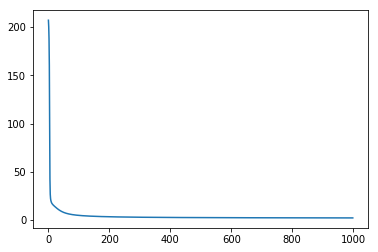

In [57]:
plt.plot(losses)